# 0.Import

In [ ]:
'''
Colab 으로 하시는 분은 1번 건너뛰시길 바랍니다
          ACC                 F1 score
Logistic  0.8052132701421801  0.7976941341894471
XGB       0.79478672985782    0.7833437948310442
R F       0.79478672985782    0.7873017244690249
KNN       0.7800947867298578  0.7653894466529514
SVM       0.8029280673517395  0.7953225781957268

Keras                         0.8049797415733337
                              0.7973732948303223



SVM
v_parameter = {'C': [10, 100,1000,10000,100000,1000000],  
               'gamma': [0.0000001,0.000001,0.00001, 0.0001, 0.001,0.01]}

optimal hyper parmameter = {'C': 100000, 'gamma': 1e-05}
best f1score =  0.7962098250107343
'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
churn = pd.read_csv("C:/ITWILL/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
file = churn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from google.colab import drive
drive.mount('/content/drive/')

ModuleNotFoundError: No module named 'google'

# 1.Preprocessing

##1)데이터 보기

In [2]:
file = pd.read_csv("/content/drive/MyDrive/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")   

##2)데이터 타입 및 크기 파악

In [3]:
print(file.shape) # (7043, 21)
print(file.info()) # 결측값 없음

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

## 3)데이터 타입 변환

In [3]:
file.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
file.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [2]:
# 조건1 - 만일 PhoneService가 No 라면 MultipleLines 값은 No 변경할 것
file.loc[file["PhoneService"] == "No", "MultipleLines"] = "No"
file.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [3]:
# 조건2 - 만일 InternetService 가 No 라면 Online~ 값은 No 변경할 것
file.loc[file["InternetService"] == "No", ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]] = "No"
file.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No,...,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
file['SeniorCitizen'] = file['SeniorCitizen'].astype(object)

In [5]:
file['TotalCharges'] = pd.to_numeric(file['TotalCharges'], errors='coerce')
file.info() # 타입 변환 후엔 반드시 확인 -> 7032로 변환 되어있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 4)공백/중복값 확인



In [6]:
file.isnull().sum() # 공백 확인

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## 5)결측값 처리

In [7]:
file['TotalCharges'].replace(' ', np.nan, inplace=True)
file.dropna(axis = 0, inplace=True) # total 없는 건 0년차 가입이기 때문 -> 그냥 삭제 
file.info()
file.isnull().sum() # 공백 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 2.탐색적 데이터 분석(EDA)

## 1)종속변수 분포 파악 및 처리

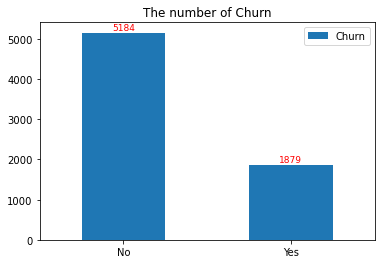

No     5163
Yes    1869
Name: Churn, dtype: int64


In [28]:
x = [0,1]
y = [5174,1869]

file['Churn'].value_counts().plot(kind='bar')
plt.title('The number of Churn')
plt.xticks(rotation=0.5)
plt.legend(loc='best')

for i, v in enumerate(x):
    plt.text(v, y[i]+10, y[i]+10,                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='red',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()
print(file['Churn'].value_counts())

# 불균형 데이터 -> accuracy 보다는 f1 score 이용

###1-1)이탈=1/이탈x=0

In [8]:
def convert(data):
    if data == "Yes":
        return 1
    else:
        return 0

In [9]:
file['churn_re'] = file['Churn'].apply(convert)

In [10]:
file.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_re
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


## 2)명목형 변수 파악

In [11]:
category_feature = [ col for col in file.columns if file[col].dtypes == "object"]
category_feature

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [12]:
category_feature = list(set(category_feature) - set(['customerID','Churn']))
category_feature

['StreamingTV',
 'PaperlessBilling',
 'MultipleLines',
 'TechSupport',
 'Contract',
 'Partner',
 'OnlineBackup',
 'Dependents',
 'OnlineSecurity',
 'DeviceProtection',
 'PhoneService',
 'InternetService',
 'StreamingMovies',
 'PaymentMethod',
 'gender',
 'SeniorCitizen']

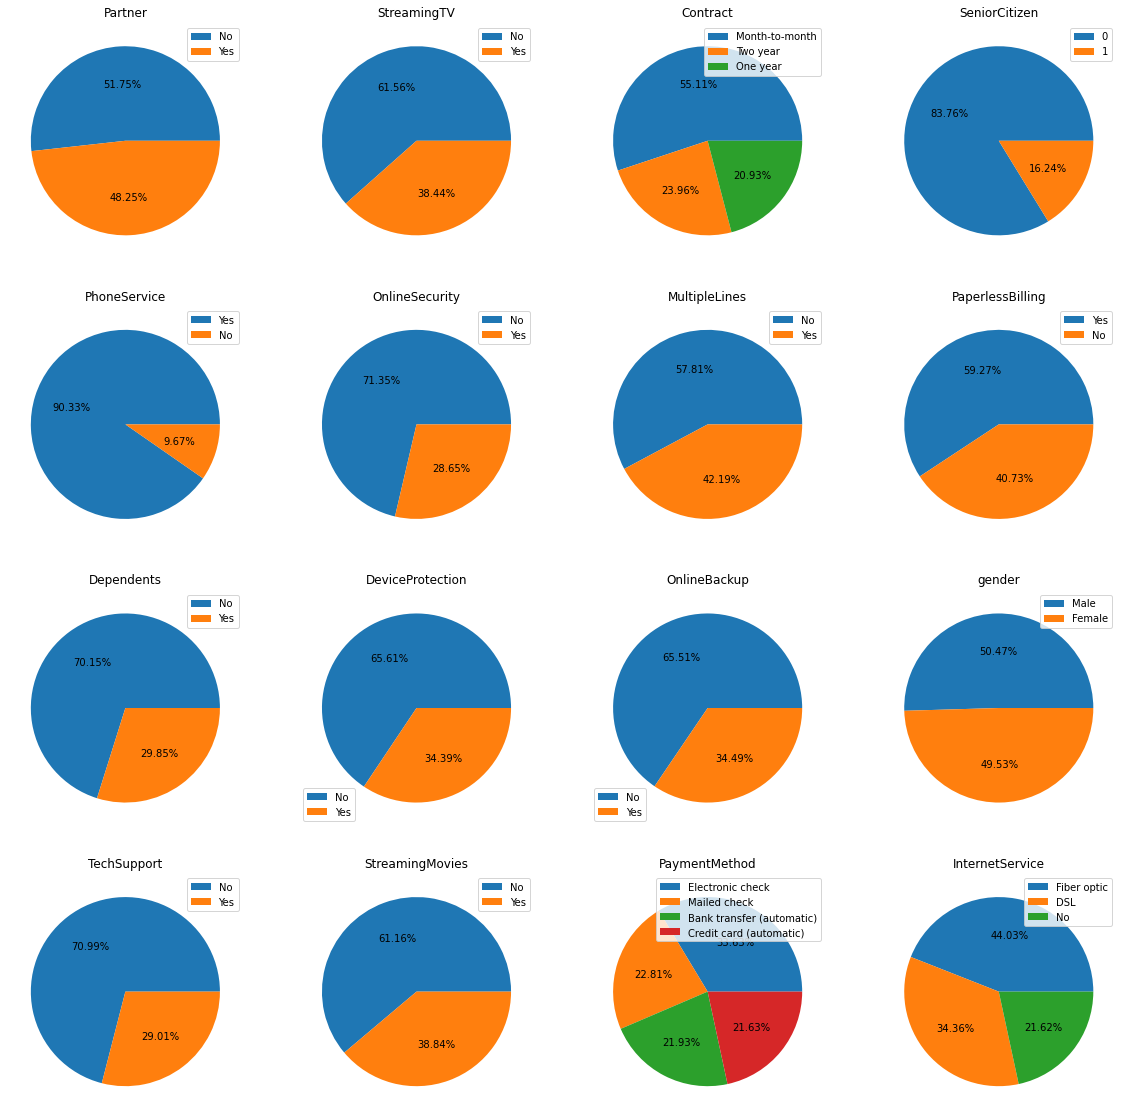

In [13]:
# 명목변수들의 분포 확인
import math
f, axes = plt.subplots(math.ceil(len(category_feature)/4),4, figsize=(20,20))
for col, ax in zip(category_feature, axes.ravel()):
        data = file[col].value_counts().values.tolist()
        labels = file[col].value_counts().index.tolist()
        ax.pie(data,autopct='%0.2f%%')
        ax.set_title(col)
        ax.legend(labels,loc='best')

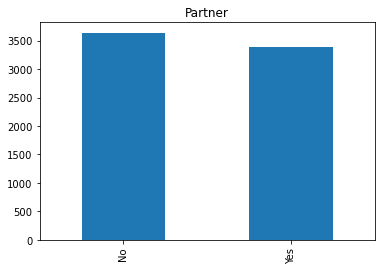

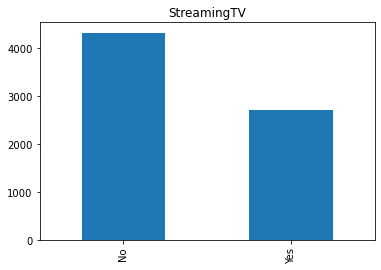

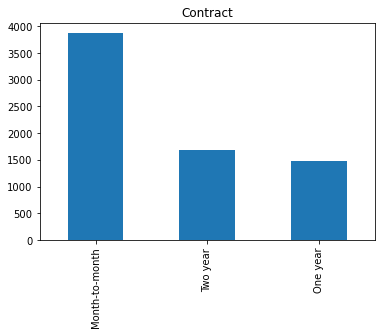

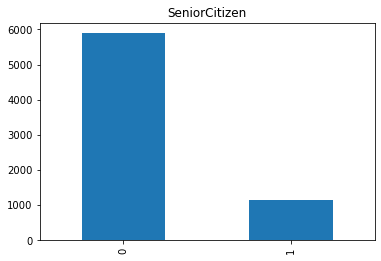

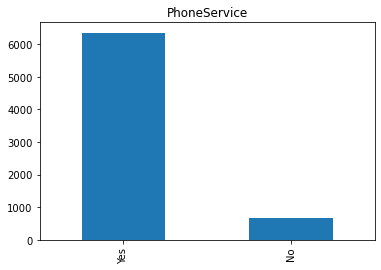

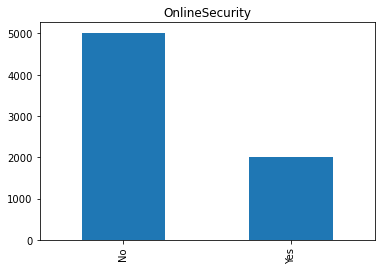

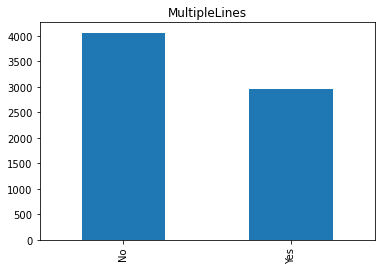

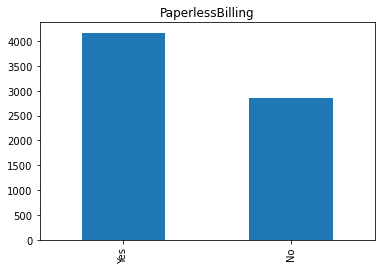

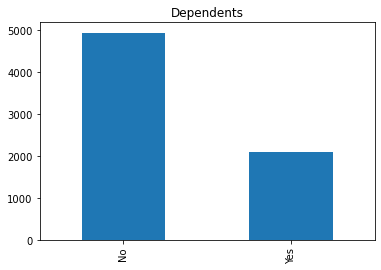

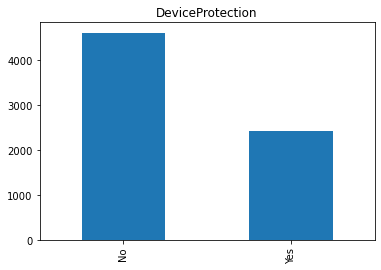

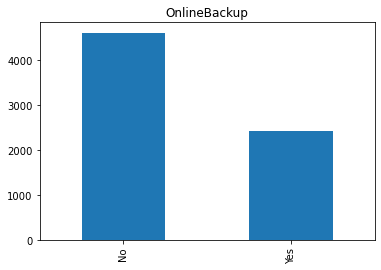

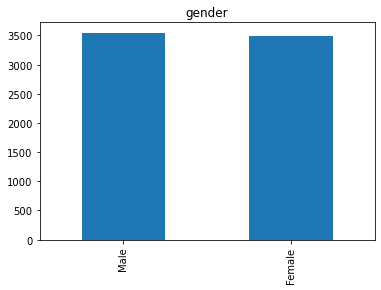

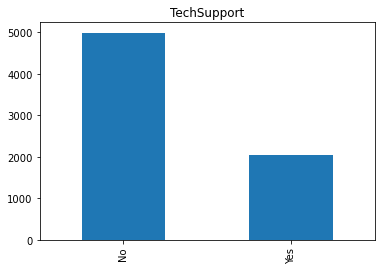

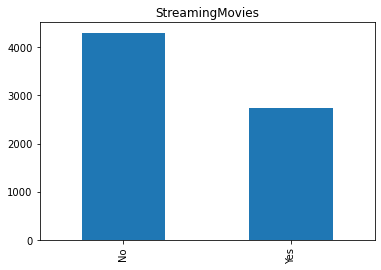

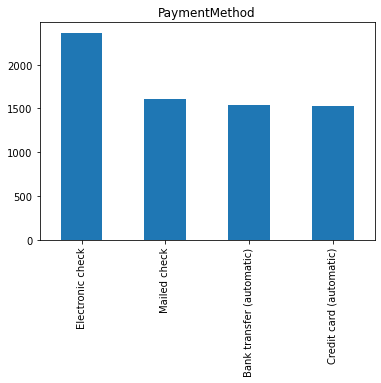

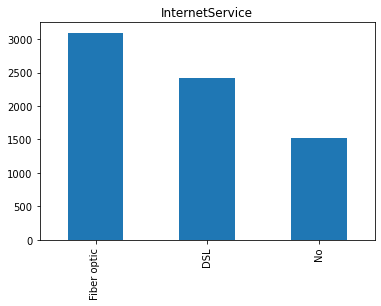

In [14]:
for col in category_feature:
    file[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

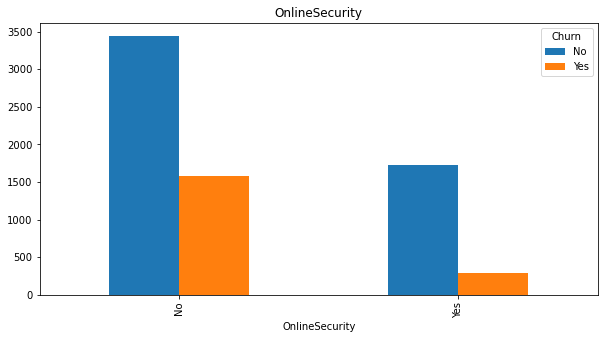

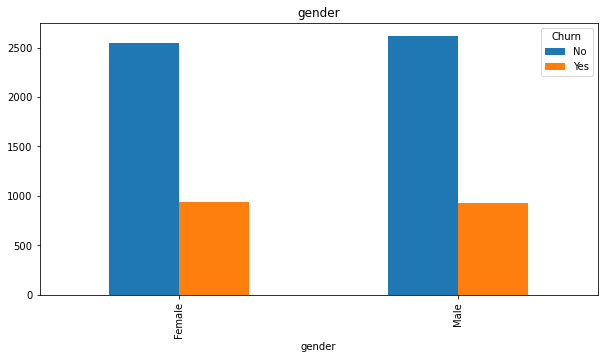

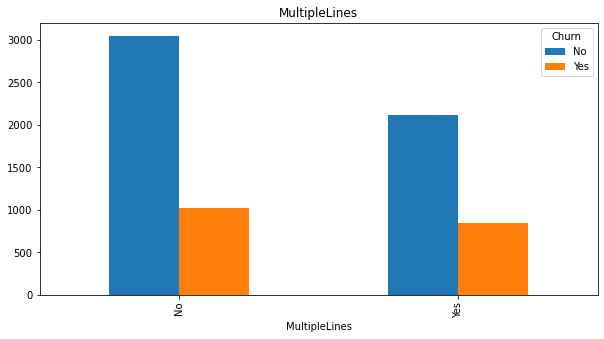

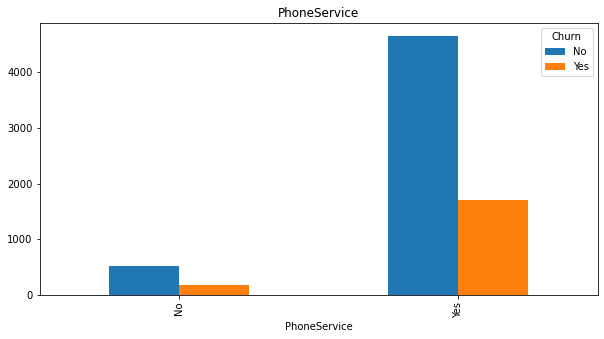

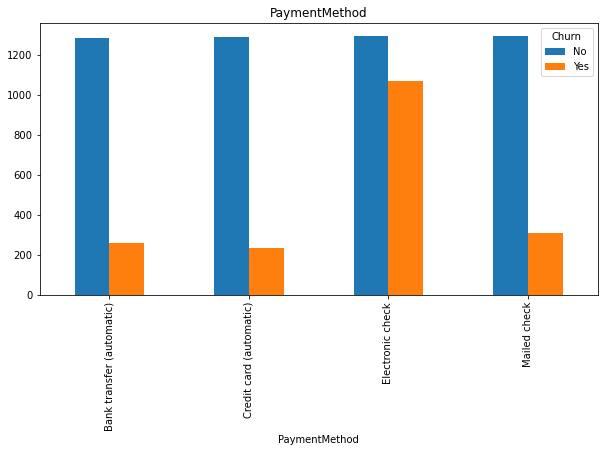

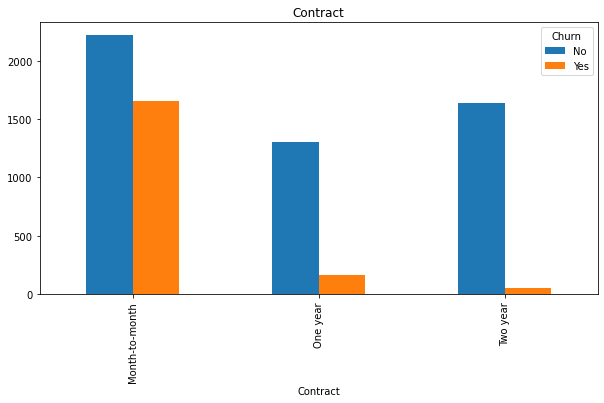

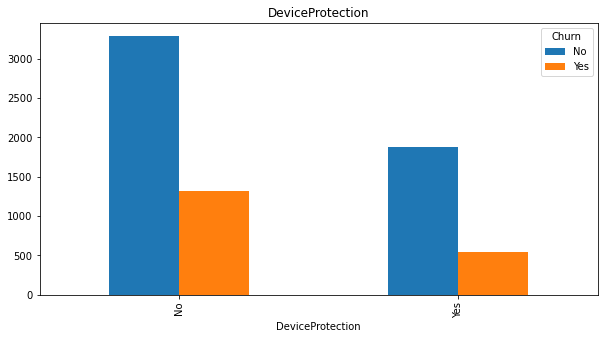

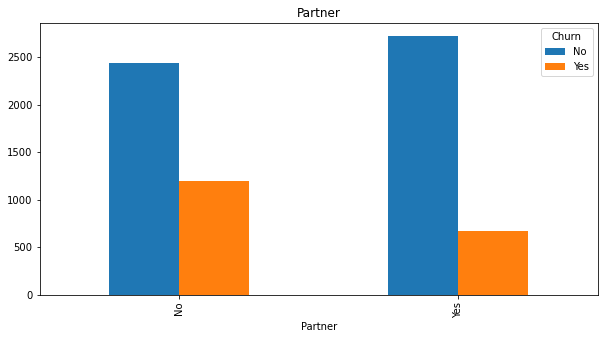

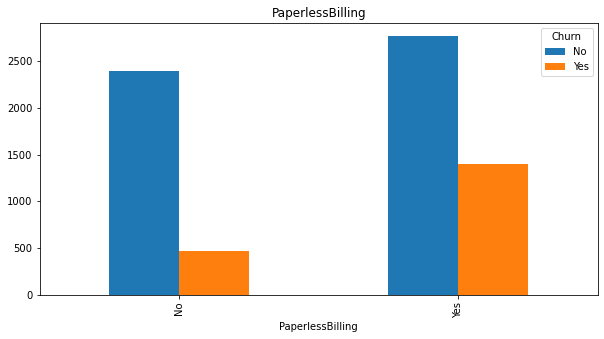

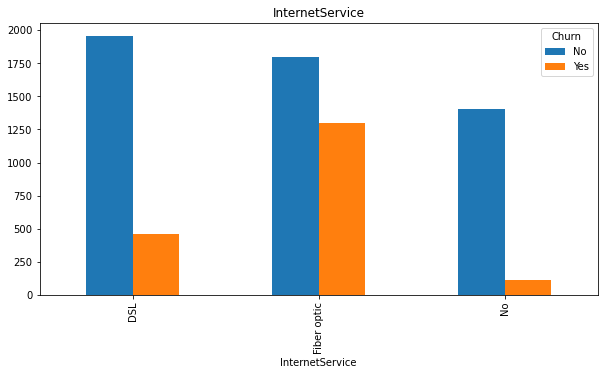

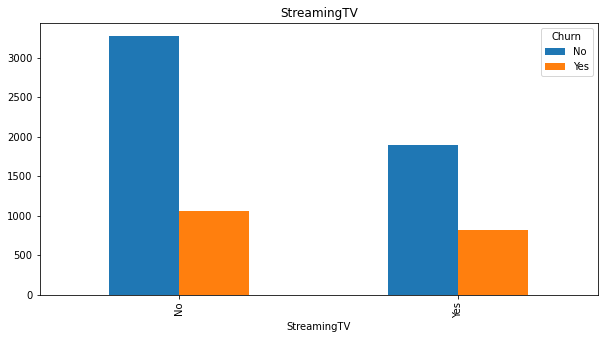

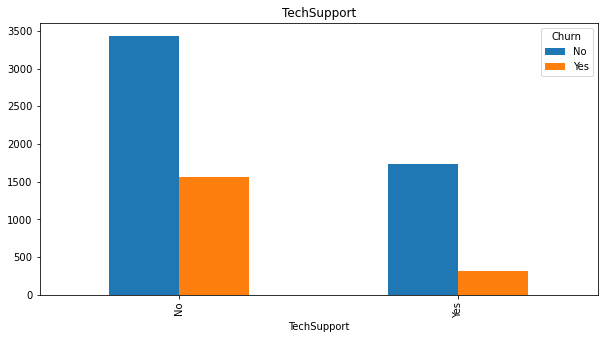

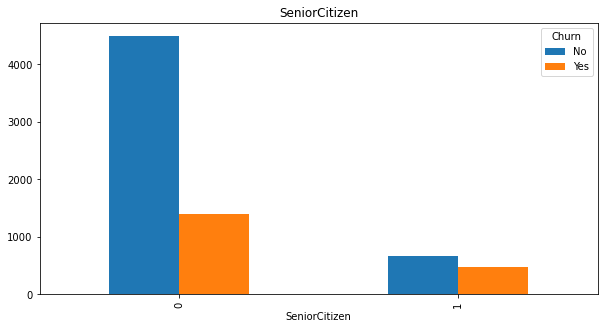

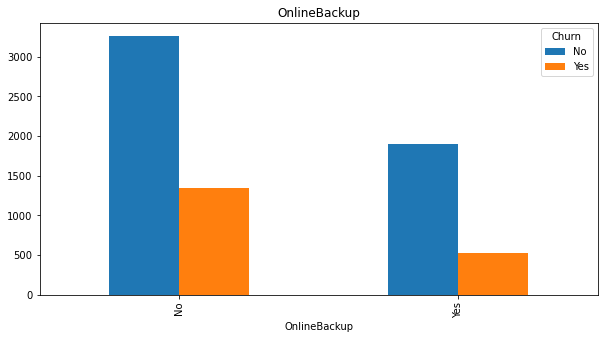

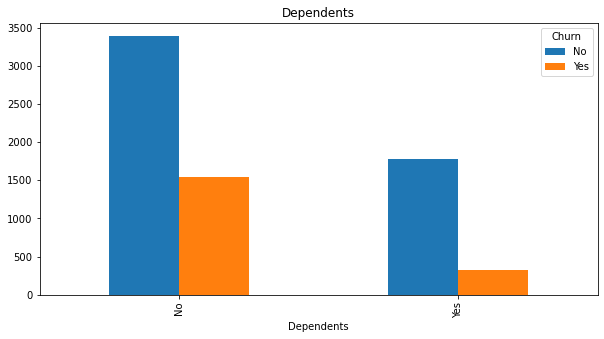

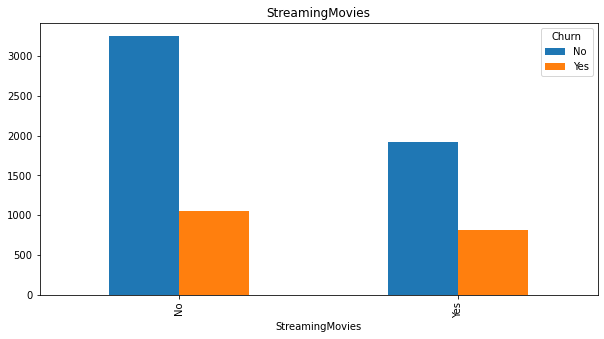

In [19]:
# 명목변수별 churn 이탈율 차이 확인
for col in category_feature:
  col_df = file.groupby([col,'Churn'])['Churn'].count().unstack('Churn')
  col_df.plot(kind='bar', figsize=(10,5))
  plt.title(col)
  plt.show()

##3)연속형 변수 파악

In [15]:
numerical_feature = list(set(file.columns) - set(category_feature) - set(['customerID','Churn']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['MonthlyCharges', 'TotalCharges', 'churn_re', 'tenure'],
      dtype='<U14')

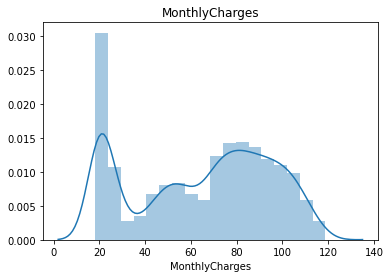

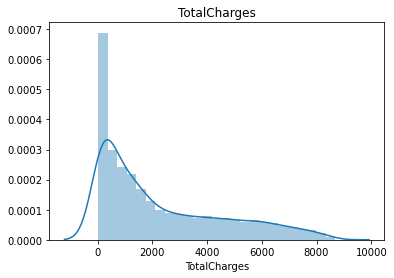

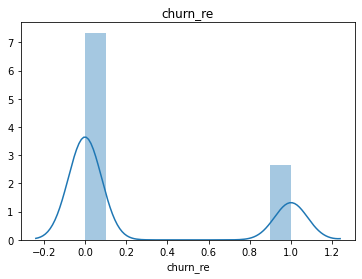

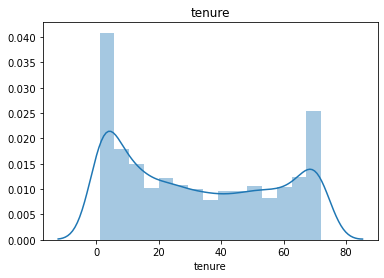

In [21]:
for col in numerical_feature:
    sns.distplot(file.loc[file[col].notnull(), col])
    plt.title(col)
    plt.show()

C:\Users\dlehg\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\dlehg\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


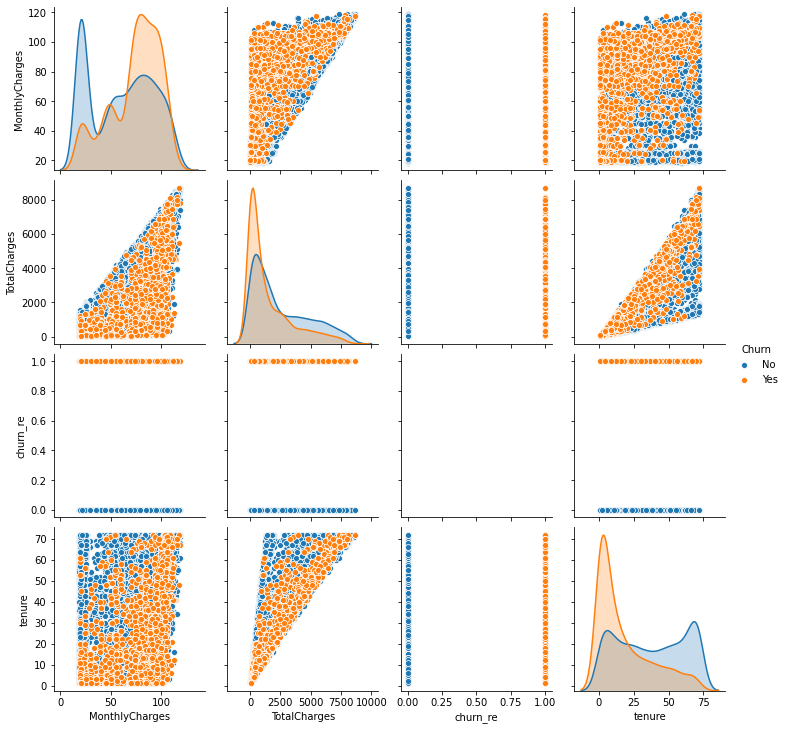

In [22]:
sns.pairplot(file[list(numerical_feature) + ['Churn']], hue='Churn', 
             x_vars=numerical_feature, y_vars=numerical_feature)
plt.show()

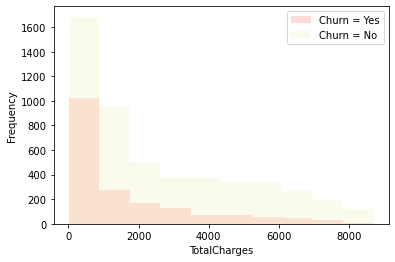

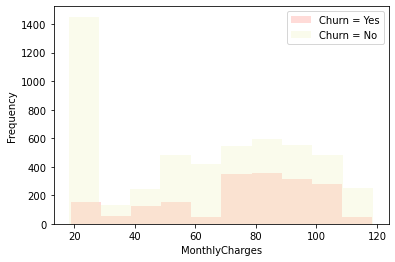

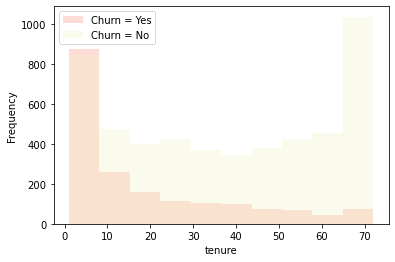

In [23]:
# array(['MonthlyCharges', 'TotalCharges', 'churn_re', 'tenure'],
file[file['churn_re'] == 1].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = '#FF8A80', label = 'Churn = Yes')
file[file['churn_re'] == 0].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = '#F0F4C3', label = 'Churn = No')

plt.xlabel('TotalCharges')
plt.legend();
plt.show()

file[file['churn_re'] == 1].MonthlyCharges.plot(kind = 'hist', alpha = 0.3, color = '#FF8A80', label = 'Churn = Yes')
file[file['churn_re'] == 0].MonthlyCharges.plot(kind = 'hist', alpha = 0.3, color = '#F0F4C3', label = 'Churn = No')

plt.xlabel('MonthlyCharges')
plt.legend();
plt.show()

file[file['churn_re'] == 1].tenure.plot(kind = 'hist', alpha = 0.3, color = '#FF8A80', label = 'Churn = Yes')
file[file['churn_re'] == 0].tenure.plot(kind = 'hist', alpha = 0.3, color = '#F0F4C3', label = 'Churn = No')

plt.xlabel('tenure')
plt.legend();
plt.show()

In [24]:
file.groupby('Churn')[['TotalCharges','MonthlyCharges', 'tenure']].agg(['min', 'max', 'mean'])

TotalCharges                       MonthlyCharges                     \
               min      max         mean            min     max       mean   
Churn                                                                        
No           18.80  8672.45  2555.344141          18.25  118.75  61.307408   
Yes          18.85  8684.80  1531.796094          18.85  118.35  74.441332   

      tenure                 
         min max       mean  
Churn                        
No         1  72  37.650010  
Yes        1  72  17.979133

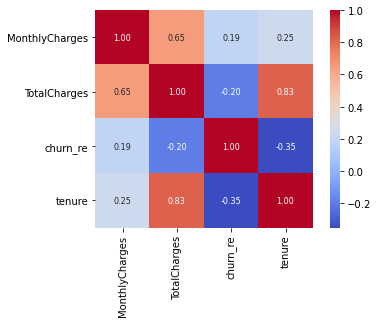

In [25]:
corr = file[list(numerical_feature)].corr('pearson')
data_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 8}, fmt = '.2f', square = True, cmap = 'coolwarm')

In [26]:
def half_corr_heatmap(data, title=None):
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)
    
    mask = np.zeros_like(data.corr())
    mask[np.tril_indices_from(mask)] = True
    
    with sns.axes_style("white"):   
        sns.heatmap(data.corr(), mask=mask, annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    plt.show()

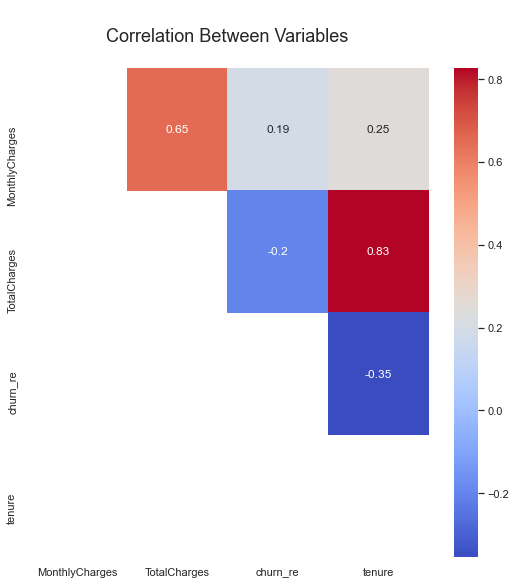

In [27]:
half_corr_heatmap(file[list(numerical_feature)], 'Correlation Between Variables')

###3-1)Tenure

In [28]:
# Tenure -> 가입기간이 짧을수록 이탈율은 높음

(0.0, 1.0)

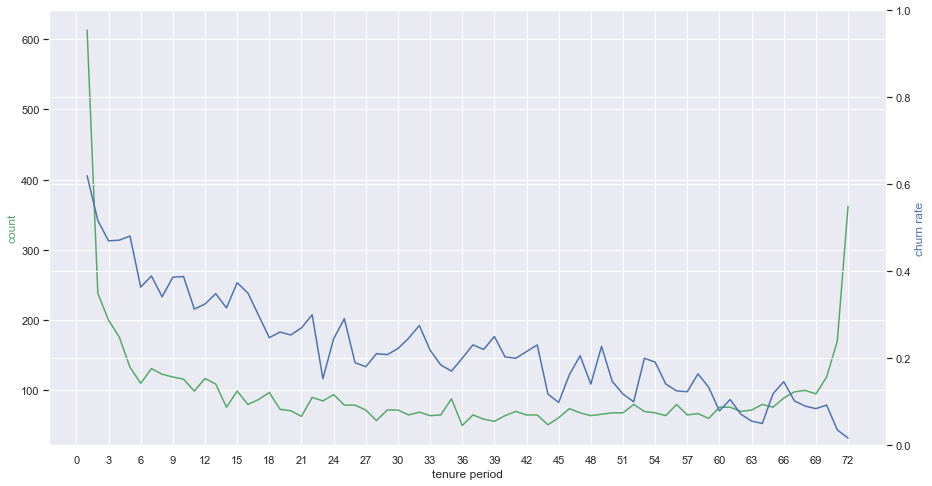

In [29]:
tenure_sort = file.tenure.value_counts().sort_index() # tenure 내림차순
x = tenure_sort.index 
y1 = tenure_sort.values
y2 = file.groupby('tenure').churn_re.mean().values # 가입기간 별 이탈률 평균

fig, ax1 = plt.subplots(figsize = (15,8))

ax2 = ax1.twinx()

ax1.plot(x,y1,'g-')
ax2.plot(x,y2,'b-')

ax1.set_xticks(range(0,73,3))
ax1.set_xlabel('tenure period')
ax1.set_ylabel('count', color='g')
ax2.set_ylabel('churn rate', color='b')
ax2.set_ylim((0,1))

## 4)명목-연속 분포 대략 확인

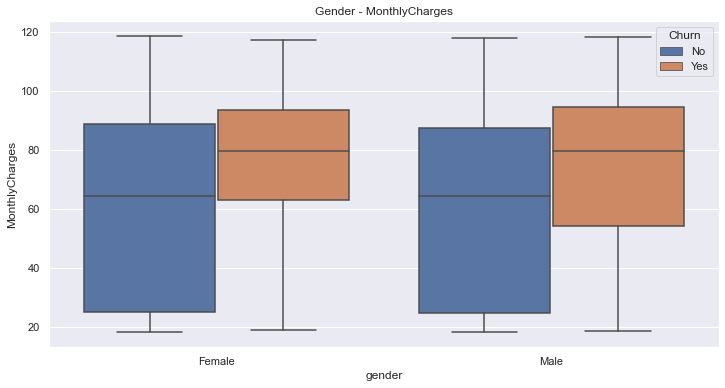

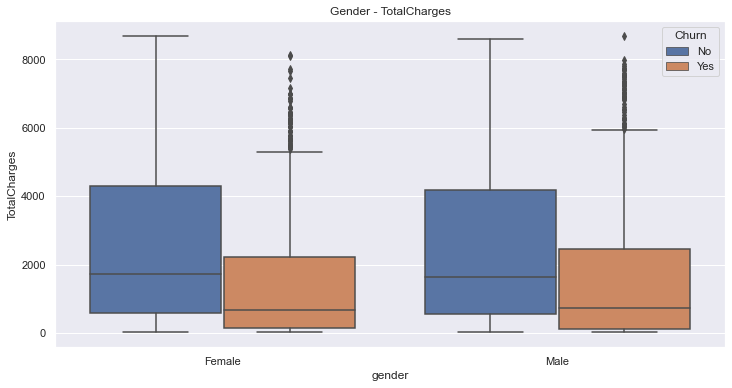

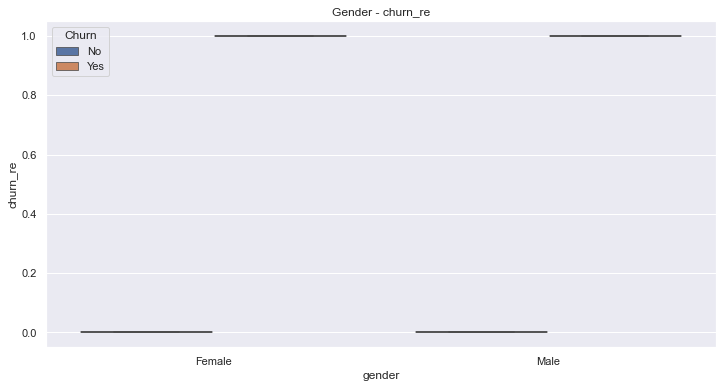

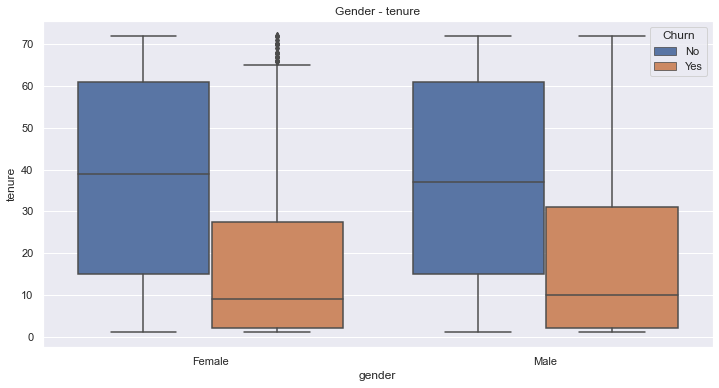

In [30]:
unique_list = file['gender'].unique()
 
for col in numerical_feature:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='gender', y=col, hue='Churn', data=file.dropna())
    plt.title("Gender - {}".format(col))
    plt.show()

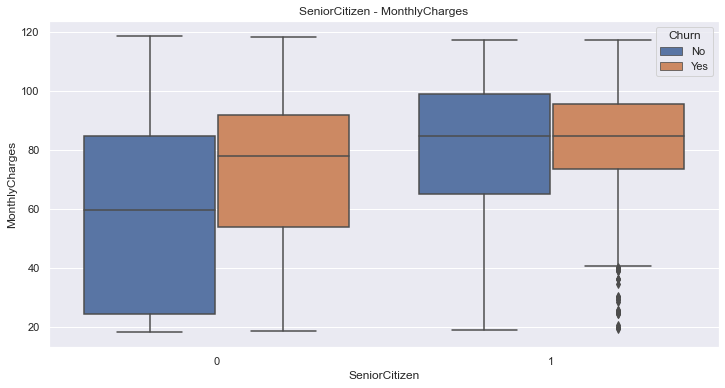

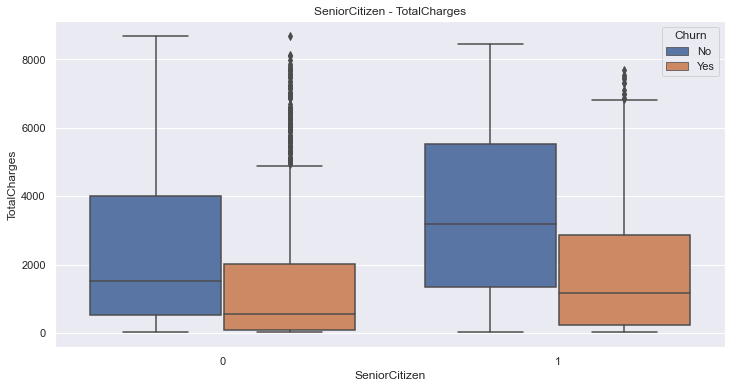

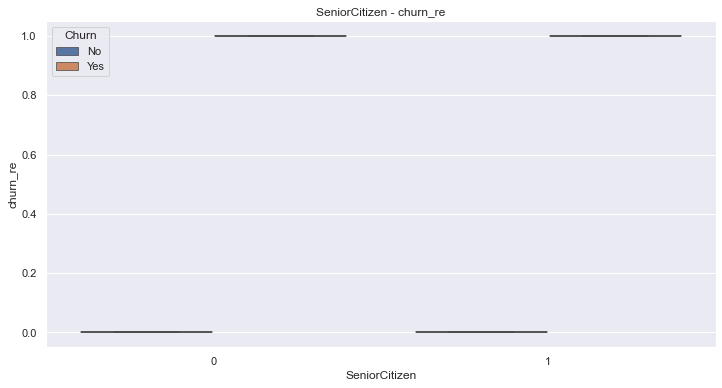

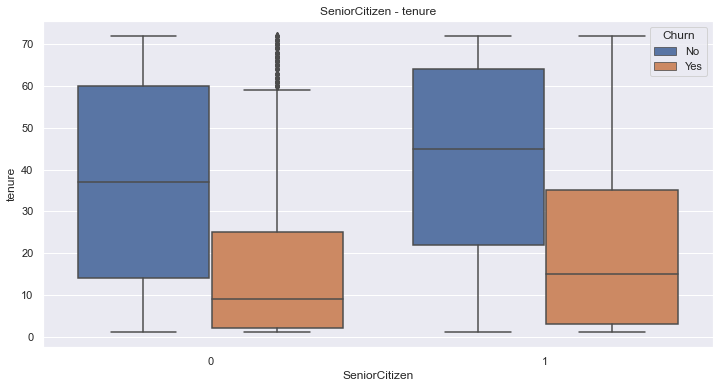

In [31]:
unique_list = file['SeniorCitizen'].unique()
 
for col in numerical_feature:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='SeniorCitizen', y=col, hue='Churn', data=file.dropna())
    plt.title("SeniorCitizen - {}".format(col))
    plt.show()

In [11]:
import copy

In [12]:
##9.필요없는 변수 제거
data = copy.deepcopy(file)
data = data.drop(['gender'], axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


#3.Data Split

In [14]:
cols = list(data.columns)
print(len(cols))

X = data.drop(['Churn','churn_re','customerID','TotalCharges'],axis=1)
X = pd.get_dummies(X)
X_cols = X.columns
y = data['churn_re'] # churn 종속변수
print(X_cols)

21
Index(['tenure', 'MonthlyCharges', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [15]:
from sklearn import preprocessing
x = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scale, columns = X_cols)
X

,tenure,MonthlyCharges,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.464789,0.385075,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.014085,0.354229,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.619718,0.239303,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.014085,0.521891,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.323944,0.662189,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,1.000000,0.845274,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0.140845,0.112935,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,0.042254,0.558706,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


##1)SEED 일정하게 설정

In [16]:
import numpy as np
import random as rn

In [17]:
seed_num=123
np.random.seed(seed_num)
rn.seed(seed_num)

#4.Model Selection_ML

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.metrics import f1_score,confusion_matrix,classification_report,accuracy_score,recall_score,precision_score
from sklearn import metrics

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

##1.Logistic Regression

help(LogisticRegression)

random_state=None, solver='lbfgs', max_iter=100, multi_class='auto'

1. random_state=123 : seed값 지정  
2. solver='lbfgs' : 모델 최적화 알고리즘 
  {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default='lbfgs'
  일반 데이터셋 : lbfgs
  빅 데이터셋 : 'sag', 'saga'
3. max_iter=100 : 반복학습 횟수 
4. multi_class='auto' : 이항분류 or 다항분류 
   multi_class : {'auto', 'ovr', 'multinomial'}, default='auto'


In [20]:
obj = LogisticRegression(random_state=123, multi_class='auto')
model = obj.fit(X_train, y_train)

In [21]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

In [22]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [47]:
'''
C : 기본값(1)
    C 값이 작으면 Penalty가 강해짐(단순 모델)
    C 값이 크면 Penalty가 약해짐(정규화 없어짐)
Penalty
    L1 : LASSO / 변수가 많아 줄어야할 때 사용 / 모델 단순화, 해석에 용이
    L2 : Ridge 일반적으로 사용(default)
'''

'\nC : 기본값(1)\n    C 값이 작으면 Penalty가 강해짐(단순 모델)\n    C 값이 크면 Penalty가 약해짐(정규화 없어짐)\nPenalty\n    L1 : LASSO / 변수가 많아 줄어야할 때 사용 / 모델 단순화, 해석에 용이\n    L2 : Ridge 일반적으로 사용(default)\n'

In [23]:
grid_search.fit(X_train, y_train)

C:\Users\dlehg\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dlehg\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dlehg\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dlehg\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\dlehg\Anaconda3\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [24]:
grid_search.score(X_test, y_test)

0.8052132701421801

In [25]:
grid_search.best_params_

{'C': 1, 'penalty': 'l2'}

In [26]:
param_grid2 = {'C': 1, 'penalty': 'l2'}
grid_search2 = GridSearchCV(LogisticRegression(), param_grid, cv=5,scoring=make_scorer(f1_score, average='weighted'))

In [27]:
grid_search2.fit(X_train,y_train)
grid_search2.score(X_test,y_test)

C:\Users\dlehg\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dlehg\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dlehg\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dlehg\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\dlehg\Anaconda3\lib\site-packages\sklearn\model_selection\_v

0.7976941341894471

In [28]:
grid_search3 = GridSearchCV(LogisticRegression(), param_grid, cv=5,scoring=make_scorer(accuracy_score))
grid_search3.fit(X_train,y_train)

C:\Users\dlehg\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dlehg\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dlehg\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dlehg\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\dlehg\Anaconda3\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring=make_scorer(accuracy_score))

In [29]:
grid_search3.score(X_test,y_test)

0.8052132701421801

In [183]:
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(abs(classifier.coef_[0]), index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:5]
    plt.title(f'{classifier_name} - Top 5 Features')
    top_weights_selected.plot(kind="bar")
    
    return print("")

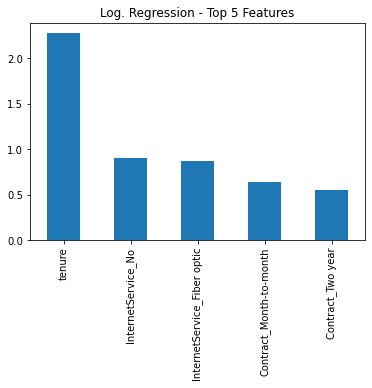

In [184]:
feature_weights(X, obj, 'Log. Regression')

## 2.xGboost (with GridSearchCV)

In [23]:
obj = XGBClassifier() # default params

# parameter 설정
params = {'colsample_bytree' : [0.6,0.8,1],
          'n_estimators':[100,150,200],
          'max_depth':[3,5,7],
          'min_child_weight': [0.5, 1, 2],
          'learning_rate' : [0.01, 0.05, 0.1]} # dict

eval_set = [(X_test, y_test)]

grid = GridSearchCV(estimator=obj, param_grid = params, cv=5, scoring='f1_weighted',n_jobs=-1)

grid_model = grid.fit(X=X_train, y=y_train, verbose=True)

print('best score = ', grid_model.best_score_)
print('best parameter =', grid_model.best_params_)
'''
best score =  0.5598616013483271
best parameter = {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 0.5, 'n_estimators': 100}
'''

C:\Users\dlehg\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:47:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best score =  0.7944463639432197
best parameter = {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 0.5, 'n_estimators': 100}


"\nbest score =  0.5598616013483271\nbest parameter = {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 0.5, 'n_estimators': 100}\n"

In [73]:
obj = XGBClassifier(colsample_bytree= 1, learning_rate= 0.1, max_depth= 5, min_child_weight= 0.5, n_estimators= 100)
model_xg = obj.fit(X=X_train, y=y_train)

# 4. model 평가 
y_pred = model_xg.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

[00:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1484
           1       0.72      0.51      0.60       626

    accuracy                           0.79      2110
   macro avg       0.77      0.71      0.73      2110
weighted avg       0.79      0.79      0.78      2110



fscore = {'Contract_Month-to-month': 37, 'MonthlyCharges': 866, 'Contract_One year': 45, 'tenure': 477, 'InternetService_Fiber optic': 20, 'InternetService_DSL': 21, 'PaymentMethod_Electronic check': 72, 'TechSupport_No': 44, 'PhoneService_No': 23, 'StreamingMovies_No': 40, 'PaymentMethod_Mailed check': 34, 'OnlineSecurity_No': 66, 'MultipleLines_No': 31, 'StreamingTV_No': 31, 'OnlineBackup_No': 55, 'Partner_No': 47, 'SeniorCitizen_0': 62, 'Dependents_No': 49, 'InternetService_No': 23, 'PaperlessBilling_No': 78, 'PaymentMethod_Bank transfer (automatic)': 64, 'PaymentMethod_Credit card (automatic)': 32, 'DeviceProtection_No': 12, 'Contract_Two year': 27}


<Figure size 36000x14400 with 0 Axes>

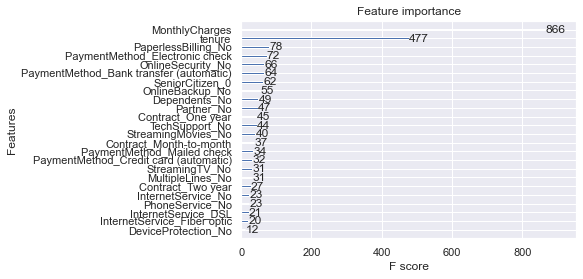

In [74]:
fscore = model.get_booster().get_fscore()
print('fscore =', fscore)

plt.figure(figsize=(500, 200))
plot_importance(booster=model)
plt.show()

# TotalCharge, MonthlyCharge, Tenure, Contract Month-to-Month

In [75]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1358  126]
 [ 307  319]]


In [76]:
print("accuracy score =", metrics.accuracy_score(y_test, y_pred))
print("F1 score =", metrics.f1_score(y_test, y_pred, average='weighted'))

accuracy score = 0.79478672985782
F1 score = 0.7833437948310442


In [77]:
y_proba = model_xg.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba)

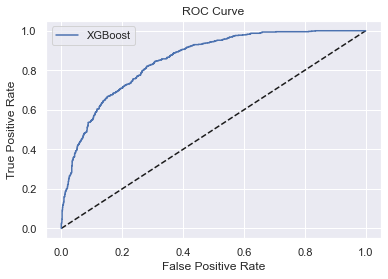

In [78]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend();

## 3.RandomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier # model
import matplotlib.pyplot as plt

In [ ]:
'''
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
'''

In [ ]:
'''
'n_estimators' : - 결정트리의 갯수를 지정
                 - Default = 10
                 - 무작정 트리 갯수를 늘리면 성능 좋아지는 것 대비 시간이 걸릴 수 있음

'max_depth' :	- 트리의 최대 깊이
              - default = None → 완벽하게 클래스 값이 결정될 때 까지 분할
                          또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할
              - 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요

'min_samples_leaf' :	- 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
                      - min_samples_split과 함께 과적합 제어 용도
                      - 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요

'min_samples_split' : - 노드를 분할하기 위한 최소한의 샘플 데이터수 → 과적합을 제어하는데 사용
                      - Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
'''

In [31]:
# train set으로 모델 생성
rf = RandomForestClassifier(random_state=123)

# test set 예측 및 평가
# 2. Grid Search Parameter 생성
rf_param_grid = {'n_estimators' : [150, 200, 250, 300], 
                 'max_depth' : [9, 10, 11],
                 'min_samples_leaf' : [7, 8, 9, 10],
                 'min_samples_split' : [1.0, 2, 3]}

# 3. GridSearchCV 객체 생성
acc_1_rf_grid = GridSearchCV(rf, param_grid=rf_param_grid, scoring='accuracy',
                             cv=5, return_train_score = True, verbose = 1)

# 4. GridSearchCV model
acc_1_rf_grid.fit(X_train, y_train)

# 5. Best Hyper parameter -> 훈련세트에서 수행한 교차검증의 평균 정확도
print("최고 평균 정확도 : {0:0.4f}".format(acc_1_rf_grid.best_score_))
print("최고의 파라미터 : ", acc_1_rf_grid.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  9.0min finished


최고 평균 정확도 : 0.8033
최고의 파라미터 :  {'max_depth': 11, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 250}


In [ ]:
'''
scoring='accuracy'
Fitting 5 folds for each of 144 candidates, totalling 720 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  9.6min finished
최고 평균 정확도 : 0.8033
최고의 파라미터 :  {'max_depth': 11, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 250}
'''

In [82]:
# train set으로 모델 생성
rf = RandomForestClassifier(random_state=123)

# test set 예측 및 평가
# 2. Grid Search Parameter 생성
rf_param_grid = {'n_estimators' : [150, 200, 250, 300],
                 'max_depth' : [9, 10, 11],
                 'min_samples_leaf' : [7, 8, 9, 10],
                 'min_samples_split' : [1.0, 2, 3]}

# 3. GridSearchCV 객체 생성
f1_1_rf_grid = GridSearchCV(rf, param_grid=rf_param_grid, scoring='f1_weighted',
                            cv=5, return_train_score = True, verbose = 1)

# 4. GridSearchCV model
f1_1_rf_grid.fit(X_train, y_train)

# 5. Best Hyper parameter -> 훈련세트에서 수행한 교차검증의 평균 정확도
print("최고 평균 정확도 : {0:0.4f}".format(f1_1_rf_grid.best_score_))
print("최고의 파라미터 : ", f1_1_rf_grid.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 10.0min finished


최고 평균 정확도 : 0.7905
최고의 파라미터 :  {'max_depth': 9, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 150}


In [ ]:
'''
scoring='f1_weighted
Fitting 5 folds for each of 144 candidates, totalling 720 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  9.6min finished
최고 평균 정확도 : 0.7905
최고의 파라미터 :  {'max_depth': 9, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 150}
'''

In [ ]:
'''
accuarcy best score : 0.8033
f1 best score : 0.7905
best params :  {'max_depth': 9, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 150}
'''

acc_test set score: 0.79478672985782


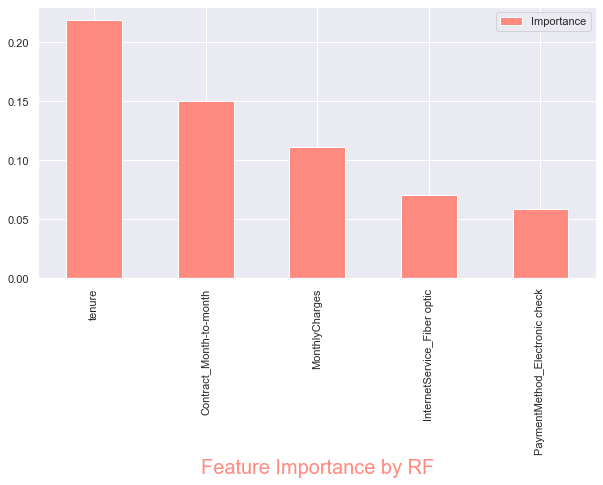

In [84]:
# 5. model evaluation -> 최적 매개변수 적용 후, 훈련한 최종 모델에 테스트데이터 평가

print('acc_test set score: {}'.format(acc_1_rf_grid.score(X_test,y_test)))

feature_importances_acc = acc_1_rf_grid.best_estimator_.feature_importances_
feature_importances_acc

feature_importance_ = pd.DataFrame({'Importance' : feature_importances_acc}, index = X.columns)
feature_importance_.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = '#FF8A80', figsize = (10, 5))
plt.xlabel("Feature Importance by RF", color = "#FF8A80", fontdict= {"fontsize" : 20});

In [85]:
# 3대 중요 변수
X_re = X.iloc[:,0:2]
print(X_re)

        tenure  MonthlyCharges
0     0.000000        0.115423
1     0.464789        0.385075
2     0.014085        0.354229
3     0.619718        0.239303
4     0.014085        0.521891
...        ...             ...
7027  0.323944        0.662189
7028  1.000000        0.845274
7029  0.140845        0.112935
7030  0.042254        0.558706
7031  0.915493        0.869652

[7032 rows x 2 columns]


In [86]:
#X_train, X_test, y_train, y_test = train_test_split(X_re, y, test_size = 0.3, random_state = 123)

In [87]:
# train set으로 모델 생성
rf = RandomForestClassifier(random_state=123)

# test set 예측 및 평가
# 2. Grid Search Parameter 생성
rf_param_grid = {'n_estimators' : [100, 150, 200],
                 'max_depth' : [8, 9,10],
                 'min_samples_leaf' : [6, 7, 8],
                 'min_samples_split' : [2]}

# 3. GridSearchCV 객체 생성
f1_re_rf_grid = GridSearchCV(rf, param_grid=rf_param_grid, scoring='f1_weighted',
                            cv=5, return_train_score = True, verbose = 1)

# 4. GridSearchCV model
f1_re_rf_grid.fit(X_train, y_train)

# 5. Best Hyper parameter -> 훈련세트에서 수행한 교차검증의 평균 정확도
print("최고 평균 정확도 : {0:0.4f}".format(f1_re_rf_grid.best_score_))
print("최고의 파라미터 : ", f1_re_rf_grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.1min finished


최고 평균 정확도 : 0.7820
최고의 파라미터 :  {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
'''
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.4min finished
최고 평균 정확도 : 0.7820
최고의 파라미터 :  {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 200}
'''

f1_test set score: 0.7589618863556198


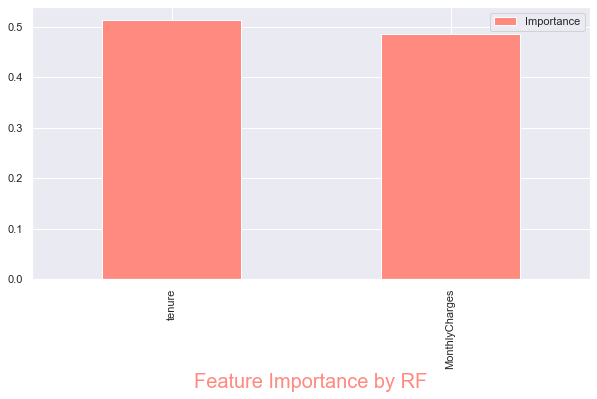

In [88]:
# 5. model evaluation -> 최적 매개변수 적용 후, 훈련한 최종 모델에 테스트데이터 평가

print('f1_test set score: {}'.format(f1_re_rf_grid.score(X_test,y_test)))

feature_importances_f1 = f1_re_rf_grid.best_estimator_.feature_importances_
feature_importances_f1

feature_importance_ = pd.DataFrame({'Importance' : feature_importances_f1}, index = X_re.columns)
feature_importance_.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar',
                                                                  color = '#FF8A80', figsize = (10, 5))
plt.xlabel("Feature Importance by RF", color = "#FF8A80", fontdict= {"fontsize" : 20});

## 4.KNN

In [123]:
testscores = []
trainscores = []
test_f1 = []
train_f1 = []

for i in range(1, 101):
    model = KNeighborsClassifier(i)
    model.fit(X_train, y_train)
    
    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train)
    
    testscores.append(metrics.accuracy_score(y_test, test_pred))
    trainscores.append(metrics.accuracy_score(y_train, train_pred))
    test_f1.append(metrics.f1_score(y_test, test_pred))
    train_f1.append(metrics.f1_score(y_train, train_pred))

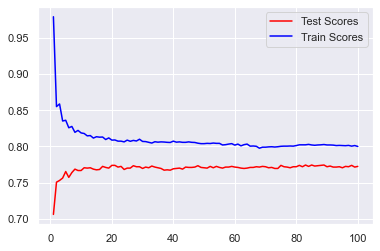

In [90]:
plt.plot(range(1, 101), testscores, label = 'Test Scores', color = 'red')
plt.plot(range(1, 101), trainscores, label = 'Train Scores', color = 'blue')
plt.legend()

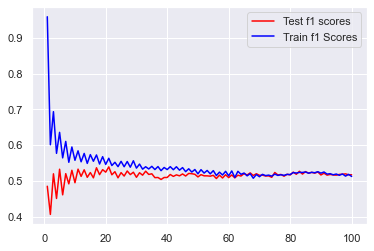

In [91]:
plt.plot(range(1, 101), test_f1, label = 'Test f1 scores', color = 'red')
plt.plot(range(1, 101), train_f1, label = 'Train f1 Scores', color = 'blue')
plt.legend()

In [ ]:
최고의 예측결과를 나타내기 위한 최적의 파라미터 조합을 찾기 위해 Grid search 사용
*   교차검증 = 5
*   p의 값은 1(Minkowski Distance), 2(Manhattan distance, Euclidean distance)

In [124]:
knn_cls = KNeighborsClassifier()
params = {
    "n_neighbors": range(30, 50, 2),
    "p": [1.0, 2.0],
    "algorithm": ["auto"]
}


grid = GridSearchCV(estimator=knn_cls, param_grid=params, scoring="f1", n_jobs=-1, cv=5, verbose=True)
grid_model = grid.fit(X=X_train, y=y_train)

print('best score = ', grid_model.best_score_)
print('best parameter =', grid_model.best_params_)

'''
best score =  0.5556915583440073
best parameter = {'algorithm': 'auto', 'n_neighbors': 48, 'p': 1.0}
'''

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s


best score =  0.5409195458249955
best parameter = {'algorithm': 'auto', 'n_neighbors': 38, 'p': 1.0}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.6s finished


"\nbest score =  0.5556915583440073\nbest parameter = {'algorithm': 'auto', 'n_neighbors': 48, 'p': 1.0}\n"

In [125]:
# Create KNN model with best parameters
knn_cls = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=48, p=1)
model_knn = knn_cls.fit(X=X_train, y=y_train)

In [126]:
# Model 평가 
y_pred = model_knn.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1484
           1       0.69      0.46      0.56       626

    accuracy                           0.78      2110
   macro avg       0.75      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [127]:
metrics.confusion_matrix(y_test, y_pred)

array([[1356,  128],
       [ 336,  290]], dtype=int64)

In [128]:
print("accuracy score =", metrics.accuracy_score(y_test, y_pred))

accuracy score = 0.7800947867298578


In [129]:
print("f1 score =", metrics.f1_score(y_test, y_pred, average='weighted'))

f1 score = 0.7653894466529514


In [98]:
y_proba = knn_cls.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba)

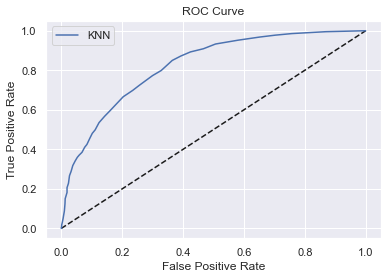

In [99]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend();

##5.SVM

In [107]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=5e46e4b4bee527f0044e4840680417a070d1670b8a7e68ccea36013fd332da69
  Stored in directory: c:\users\dlehg\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [89]:
'''
SVM 하이퍼 파라미터
C:  클수록 정확하게 (마진이 작아짐, 과대적합)
   작을수록 과대적합 방지, alpha (가중치 규제) 의 역수

gamma:  클수록 정확하게 (경사가 급해짐, 과대적합)
  작을수록 과대적합 방지
  비선형 (kernel=‘rbf’, kernel=‘poly’)에서만 이 옵션 사용
'''

'\nSVM 하이퍼 파라미터\nC:  클수록 정확하게 (마진이 작아짐, 과대적합)\n   작을수록 과대적합 방지, alpha (가중치 규제) 의 역수\n\ngamma:  클수록 정확하게 (경사가 급해짐, 과대적합)\n  작을수록 과대적합 방지\n  비선형 (kernel=‘rbf’, kernel=‘poly’)에서만 이 옵션 사용\n'

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.454518      0.002003         0.095170        0.003338     0.1   
1        0.453989      0.008575         0.092577        0.001743     0.1   
2        0.472765      0.007276         0.093263        0.002683     0.1   
3        0.477882      0.003161         0.092903        0.002759     0.1   
4        0.488102      0.007879         0.094954        0.006128     0.1   
5        0.844852      0.059680         0.149416        0.003293     0.1   
6        0.435212      0.008558         0.090744        0.000615       1   
7        0.461836      0.007277         0.091534        0.001160       1   
8        0.458852      0.004849         0.091165        0.000493       1   
9        0.463150      0.005198         0.090352        0.001200       1   
10       0.489028      0.010963         0.087955        0.001165       1   
11       0.871470      0.017198         0.148405        0.003982       1   
12       0.4

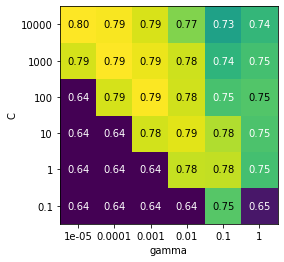

In [17]:
#1. 학습시킬 모델 생성
m_svm = SVC()

#2. 그리드 서치로 찾을 매개변수 조합 생성
v_parameter = {'C': [0.1, 1, 10, 100,1000,10000],  
               'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

#3. GridSEarchCV 모델 생성
m_gridcv = GridSearchCV(m_svm,        # 학습 모델 
                        v_parameter,  # 학습 모델의 매개변수(딕셔너리 형태)
                        cv=5,           # 교차검증 횟수
                        scoring='f1_weighted')

#4. GridSEarchCV 모델 학습
m_gridcv.fit(X_train, y_train)

#5. 매개변수 확인
df_result = pd.DataFrame(m_gridcv.cv_results_) # 교차검증 과정 확인 
print(df_result)

#6. 최종 모델 평가 
m_gridcv.score(X_test, y_test)  # m_gridcv 모델에 최적의 매개변수 저장
                                # 선택된 매개변수로 재학습 포함 

#7. 그리드 서치 결과 시각화
arr_score = np.array(df_result.mean_test_score).reshape(6,6)
import mglearn
mglearn.tools.heatmap(arr_score, 
                      xlabel='gamma',
                      xticklabels=v_parameter['gamma'],
                      ylabel='C',
                      yticklabels=v_parameter['C'],
                      cmap='viridis')   

In [18]:
print('optimal hyper parmameter =', m_gridcv.best_params_)    # 최적의 매개변수 조합 확인
print('best score = ', m_gridcv.best_score_)     # 매개변수 선택 시 best_score(CV 포함)

optimal hyper parmameter = {'C': 10000, 'gamma': 1e-05}
best score =  0.7953225781957268


In [132]:
'''
X_re = X.iloc[:,0:3]
print(X_re)
'''

      tenure  MonthlyCharges  SeniorCitizen_0
0          1           29.85                1
1         34           56.95                1
2          2           53.85                1
3         45           42.30                1
4          2           70.70                1
...      ...             ...              ...
7038      24           84.80                1
7039      72          103.20                1
7040      11           29.60                1
7041       4           74.40                0
7042      66          105.65                1

[7032 rows x 3 columns]


    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.442267      0.011825         0.093105        0.001836     0.1   
1        0.424694      0.000933         0.089556        0.000398     0.1   
2        0.449192      0.005223         0.093151        0.001493     0.1   
3        0.462364      0.008055         0.090964        0.001164     0.1   
4        0.464957      0.002148         0.091395        0.001836     0.1   
5        0.812330      0.059199         0.145802        0.001933     0.1   
6        0.426649      0.001510         0.089356        0.000481       1   
7        0.454021      0.006153         0.092756        0.002188       1   
8        0.461603      0.004392         0.093144        0.001963       1   
9        0.466179      0.003912         0.091547        0.001162       1   
10       0.486459      0.007626         0.088356        0.002150       1   
11       0.842226      0.025022         0.144597        0.003577       1   
12       0.4

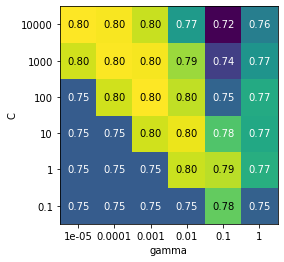

In [31]:
#1. 학습시킬 모델 생성
m_svm = SVC()

#2. 그리드 서치로 찾을 매개변수 조합 생성
v_parameter = {'C': [0.1, 1, 10, 100,1000,10000],  
               'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

#3. GridSEarchCV 모델 생성
m_gridcv = GridSearchCV(m_svm,        # 학습 모델 
                        v_parameter,  # 학습 모델의 매개변수(딕셔너리 형태)
                        cv=5,           # 교차검증 횟수
                        scoring=make_scorer(accuracy_score))

#4. GridSEarchCV 모델 학습
m_gridcv.fit(X_train, y_train)

#5. 매개변수 확인
df_result = pd.DataFrame(m_gridcv.cv_results_) # 교차검증 과정 확인 
print(df_result)

#6. 최종 모델 평가 
m_gridcv.score(X_test, y_test)  # m_gridcv 모델에 최적의 매개변수 저장
                                # 선택된 매개변수로 재학습 포함 

#7. 그리드 서치 결과 시각화
arr_score = np.array(df_result.mean_test_score).reshape(6,6)
import mglearn
mglearn.tools.heatmap(arr_score, 
                      xlabel='gamma',
                      xticklabels=v_parameter['gamma'],
                      ylabel='C',
                      yticklabels=v_parameter['C'],
                      cmap='viridis')   

In [33]:
print('optimal hyper parmameter =', m_gridcv.best_params_)    # 최적의 매개변수 조합 확인
print('best score = ', m_gridcv.best_score_)     # 매개변수 선택 시 best_score(CV 포함)

optimal hyper parmameter = {'C': 100, 'gamma': 0.001}
best score =  0.8029280673517395


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0        0.436334      0.007868         0.091156        0.000488       10   
1        0.443724      0.002183         0.093542        0.002697       10   
2        0.446774      0.003329         0.091545        0.000757       10   
3        0.459205      0.004565         0.091209        0.000560       10   
4        0.453990      0.005172         0.091356        0.001850       10   
5        0.469875      0.004616         0.084583        0.001320       10   
6        0.443218      0.004053         0.090747        0.000647      100   
7        0.450312      0.003248         0.091364        0.001751      100   
8        0.461756      0.006118         0.091172        0.000476      100   
9        0.461569      0.007287         0.090558        0.000747      100   
10       0.474125      0.006169         0.084980        0.001454      100   
11       0.680979      0.017612         0.081790        0.001085      100   

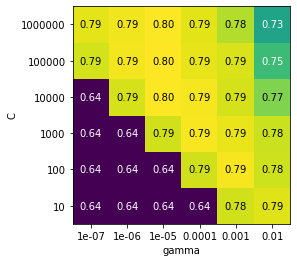

In [19]:
#1. 학습시킬 모델 생성
m_svm = SVC()

#2. 그리드 서치로 찾을 매개변수 조합 생성
v_parameter = {'C': [10, 100,1000,10000,100000,1000000],  
               'gamma': [0.0000001,0.000001,0.00001, 0.0001, 0.001,0.01]}

#3. GridSEarchCV 모델 생성
m_gridcv = GridSearchCV(m_svm,        # 학습 모델 
                        v_parameter,  # 학습 모델의 매개변수(딕셔너리 형태)
                        cv=5,           # 교차검증 횟수
                        scoring='f1_weighted')

#4. GridSEarchCV 모델 학습
m_gridcv.fit(X_train, y_train)

#5. 매개변수 확인
df_result = pd.DataFrame(m_gridcv.cv_results_) # 교차검증 과정 확인 
print(df_result)

#6. 최종 모델 평가 
m_gridcv.score(X_test, y_test)  # m_gridcv 모델에 최적의 매개변수 저장
                                # 선택된 매개변수로 재학습 포함 

#7. 그리드 서치 결과 시각화
arr_score = np.array(df_result.mean_test_score).reshape(6,6)
import mglearn
mglearn.tools.heatmap(arr_score, 
                      xlabel='gamma',
                      xticklabels=v_parameter['gamma'],
                      ylabel='C',
                      yticklabels=v_parameter['C'],
                      cmap='viridis')   

In [21]:
print('optimal hyper parmameter =', m_gridcv.best_params_)    # 최적의 매개변수 조합 확인
print('best score = ', m_gridcv.best_score_)     # 매개변수 선택 시 best_score(CV 포함)

optimal hyper parmameter = {'C': 100000, 'gamma': 1e-05}
best score =  0.7962098250107343


##6.Keras - y모양을 바꿔야하므로 맨 마지막에 실행할 것

In [19]:
!pip install tensorflow

  Using cached tensorflow-2.4.0-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.32.0-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.4.0-py3-none-any.whl (10.6 MB)
  Using cached google_auth_oauthlib-0.4.2-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.3-py3-none-any.whl (96 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached wrapt-1.12.1-py3-none-any.whl
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout 
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

In [77]:
tf.random.set_seed(123)

### 6-1 KERAS TUNING

In [36]:
# 구글에서 발표한 keras tuner를 이용하면 최적의 하이퍼파라미터 검색 가능 but 따로 신청 및 
'''
def model_fn():

    LR = Choice('learning_rate', [0.01, 0.001, 0.0005, 0.0001], group='optimizer')
    DROPOUT_RATE = Linear('dropout_rate', 0.0, 0.5, 5, group='dense')
    NUM_DIMS = Range('num_dims', 8, 32, 4, group='dense')
    NUM_LAYERS = Range('num_layers', 1, 3, group='dense')

    model = Sequential()

    model.add(Flatten())
    model.add(Dense(18, input_shape=(37,), activation='relu'))
    for _ in range(NUM_LAYERS):
        model.add(Dense(NUM_DIMS, activation='relu'))
        model.add(Dropout(DROPOUT_RATE))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(LR))

    return model

tuner = Tuner(model_fn, 'val_accuracy', epochs_budget=500, max_epochㄴ=5)
tuner.search(train_data,validation_data=validation_data)
'''


"\ndef model_fn():\n\n    LR = Choice('learning_rate', [0.01, 0.001, 0.0005, 0.0001], group='optimizer')\n    DROPOUT_RATE = Linear('dropout_rate', 0.0, 0.5, 5, group='dense')\n    NUM_DIMS = Range('num_dims', 8, 32, 4, group='dense')\n    NUM_LAYERS = Range('num_layers', 1, 3, group='dense')\n\n    model = Sequential()\n\n    model.add(Flatten())\n    model.add(Dense(18, input_shape=(37,), activation='relu'))\n    for _ in range(NUM_LAYERS):\n        model.add(Dense(NUM_DIMS, activation='relu'))\n        model.add(Dropout(DROPOUT_RATE))\n    model.add(Dense(2, activation='sigmoid'))\n    model.compile(loss='categorical_crossentropy', optimizer=Adam(LR))\n\n    return model\n\ntuner = Tuner(model_fn, 'val_accuracy', epochs_budget=500, max_epochㄴ=5)\ntuner.search(train_data,validation_data=validation_data)\n"

In [24]:
!pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)


In [78]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [79]:
model = Sequential()

# hidden layer1 : [37, 18] -> [in, node]
model.add(Dense(18, input_shape=(36,), activation='relu')) # 1층
Dropout(rate = 0.4) 

# output layer
model.add(Dense(2, activation='sigmoid')) # 2층

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001)
                 ,loss=tf.keras.losses.binary_crossentropy
                 ,metrics=['acc',f1_m,precision_m, recall_m])

# model dnn layer 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 18)                666       
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 38        
Total params: 704
Trainable params: 704
Non-trainable params: 0
_________________________________________________________________


In [80]:
callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model_fit = model.fit(X_train, y_train,
          epochs = 100,
          verbose = 1,
          validation_data = (X_test, y_test),
          callbacks = callback)

loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test)
print('f1_score =', f1_score)
print('val loss =', loss)
accuracy

Epoch 1/100
154/154 [==============================] - 1s 4ms/step - loss: 0.5764 - acc: 0.7446 - f1_m: 0.7355 - precision_m: 0.7105 - recall_m: 0.7748 - val_loss: 0.4996 - val_acc: 0.7450 - val_f1_m: 0.7132 - val_precision_m: 0.7822 - val_recall_m: 0.6569
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4770 - acc: 0.7670 - f1_m: 0.7465 - precision_m: 0.8039 - recall_m: 0.6992 - val_loss: 0.4525 - val_acc: 0.7829 - val_f1_m: 0.7731 - val_precision_m: 0.7972 - val_recall_m: 0.7512
Epoch 3/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4314 - acc: 0.7956 - f1_m: 0.7893 - precision_m: 0.8068 - recall_m: 0.7731 - val_loss: 0.4401 - val_acc: 0.7886 - val_f1_m: 0.7877 - val_precision_m: 0.7955 - val_recall_m: 0.7806
Epoch 4/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4334 - acc: 0.7912 - f1_m: 0.7888 - precision_m: 0.7939 - recall_m: 0.7842 - val_loss: 0.4361 - val_acc: 0.7929 - val_f1_m: 0.7907 - val_precision_m: 0.

dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


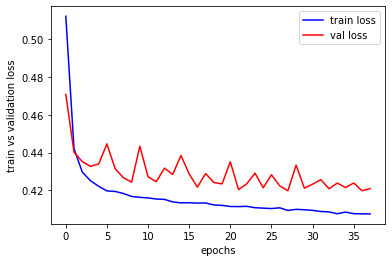

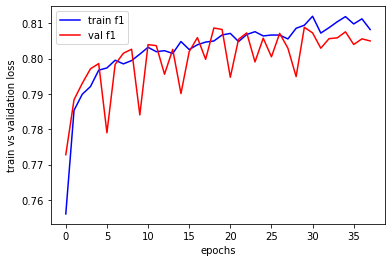

In [126]:
print(model_fit.history.keys())

# loss vs val_loss
plt.plot(model_fit.history['loss'], 'b', label='train loss')
plt.plot(model_fit.history['val_loss'], 'r', label='val loss')
plt.xlabel('epochs')
plt.ylabel('train vs validation loss')
plt.legend(loc = 'best')
plt.show()

# f1 vs val_f1
plt.plot(model_fit.history['f1_m'], 'b', label='train f1')
plt.plot(model_fit.history['val_f1_m'], 'r', label='val f1')
plt.xlabel('epochs')
plt.ylabel('train vs validation loss')
plt.legend(loc = 'best')
plt.show()

In [73]:
model2 = Sequential()

# hidden layer1 : [37, 18] -> [in, node]
model2.add(Dense(18, input_shape=(36,), activation='relu')) # 1층
Dropout(rate = 0.5) 

# hidden layer2 : [18, 9] -> [in, node]
model2.add(Dense(9, activation='relu')) # 2층
Dropout(rate = 0.3) 

# hidden layer3 : [9, 4] -> [in, node]
model2.add(Dense(4, activation='relu')) # 3층
Dropout(rate = 0.3) 

# output layer
model2.add(Dense(2, activation='sigmoid')) # 4층

model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001)
                 ,loss=tf.keras.losses.binary_crossentropy
                 ,metrics=['acc',f1_m,precision_m, recall_m])

# model dnn layer 확인
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 18)                666       
_________________________________________________________________
dense_17 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 10        
Total params: 887
Trainable params: 887
Non-trainable params: 0
_________________________________________________________________


In [74]:
callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model2_fit = model2.fit(X_train, y_train, # 훈련셋
          epochs = 100, # 반복학습 수
          verbose = 1, # 콘솔 출력
          validation_data = (X_test, y_test),
          callbacks = callback)

# 7. model evaulation : test dataset
loss, accuracy, f1_score, precision, recall = model2.evaluate(X_test, y_test)
print('f1_score =', f1_score)
print('loss =', loss)
accuray

Epoch 1/100
154/154 [==============================] - 1s 3ms/step - loss: 0.6909 - acc: 0.6282 - f1_m: 0.5020 - precision_m: 0.7118 - recall_m: 0.4408 - val_loss: 0.6670 - val_acc: 0.7033 - val_f1_m: 0.6993 - val_precision_m: 0.7017 - val_recall_m: 0.6971
Epoch 2/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6550 - acc: 0.7405 - f1_m: 0.7404 - precision_m: 0.7405 - recall_m: 0.7403 - val_loss: 0.6473 - val_acc: 0.7033 - val_f1_m: 0.7033 - val_precision_m: 0.7033 - val_recall_m: 0.7033
Epoch 3/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6284 - acc: 0.7529 - f1_m: 0.7529 - precision_m: 0.7529 - recall_m: 0.7529 - val_loss: 0.6329 - val_acc: 0.7033 - val_f1_m: 0.7033 - val_precision_m: 0.7033 - val_recall_m: 0.7033
Epoch 4/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6096 - acc: 0.7527 - f1_m: 0.7527 - precision_m: 0.7527 - recall_m: 0.7527 - val_loss: 0.6227 - val_acc: 0.7033 - val_f1_m: 0.7033 - val_precision_m: 0.

dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


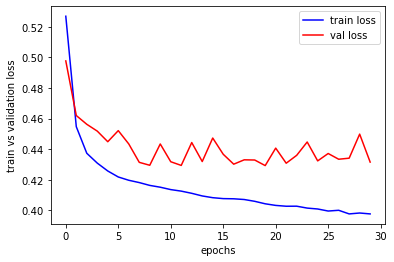

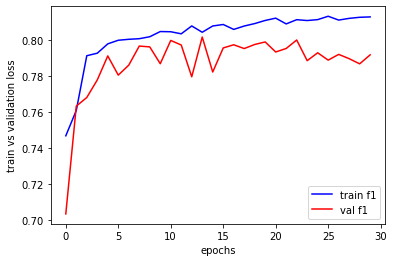

In [129]:
print(model2_fit.history.keys())

# loss vs val_loss
plt.plot(model2_fit.history['loss'], 'b', label='train loss')
plt.plot(model2_fit.history['val_loss'], 'r', label='val loss')
plt.xlabel('epochs')
plt.ylabel('train vs validation loss')
plt.legend(loc = 'best')
plt.show()

# f1 vs val_f1
plt.plot(model2_fit.history['f1_m'], 'b', label='train f1')
plt.plot(model2_fit.history['val_f1_m'], 'r', label='val f1')
plt.xlabel('epochs')
plt.ylabel('train vs validation loss')
plt.legend(loc = 'best')
plt.show()